## Customer Service Request Analysis

## Problem Statement
You've been asked to analyze data on service request (311) calls 
from New York City. You've also been asked to utilize data 
wrangling techniques to understand the patterns in the data and 
visualize the major types of complaints.

In [33]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [34]:
#1.1 Import the dataset
df=pd.read_csv("C:/Users/nishita/OneDrive/Desktop/RECYKAL/311_Service_Requests_from_2010_to_Present.csv",dtype='unicode',sep=",")

In [35]:
#1.2 Visualize the dataset
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568153633767,-73.92350095571744,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945312321085,-73.91509393898605,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870324522111424,-73.88852464418646,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599404683083,-73.82837939584206,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733059618956815,-73.87416975810375,"(40.733059618956815, -73.87416975810375)"


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      362177 non-null  object        
 1   Created Date                    362177 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          362177 non-null  object        
 4   Agency Name                     362177 non-null  object        
 5   Complaint Type                  362177 non-null  object        
 6   Descriptor                      355681 non-null  object        
 7   Location Type                   362047 non-null  object        
 8   Incident Zip                    361502 non-null  object        
 9   Incident Address                310491 non-null  object        
 10  Street Name                     310491 non-null  object 

In [36]:
#1.3 Print the columns of the DataFrame
list(df.columns.values)

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',


In [68]:
#1.4 Identify the shape of the dataset
df.shape

(364558, 53)

In [101]:
df.isnull().any()

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [73]:
#1.5 Identify the variables with null values
list(df.columns[df.isnull().any()])

['Closed Date',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Due Date',
 'Resolution Action Updated Date',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'School Region',
 'School Code',
 'School Zip',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

In [255]:
#print(nullcols.index)
#returns the col names
#print(nullcols.keys())

In [242]:
#summarising null value percentage in each column of the dataset
nullcols=df.isnull().sum()/len(df)*100
nullcols

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.000000
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.793598
Location Type                       0.035894
Incident Zip                        0.186373
Incident Address                   14.270923
Street Name                        14.270923
Cross Street 1                     15.277337
Cross Street 2                     15.314059
Intersection Street 1              86.021200
Intersection Street 2              86.055437
Address Type                        0.256504
City                                0.000000
Landmark                           99.896459
Facility Type                       0.004970
Status                              0.000000
Due Date                            0.000276
Resolution Description              0.000000
Resolution

<BarContainer object of 53 artists>

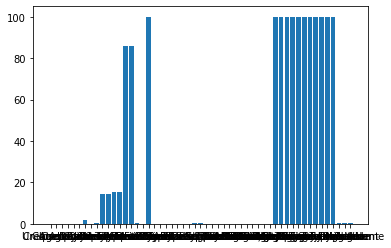

In [249]:
#plotting using matplotlib (percent of null values)
plt.bar(nullcols.index,nullcols)

<AxesSubplot:xlabel='Column Names', ylabel='Frequency of Null Values'>

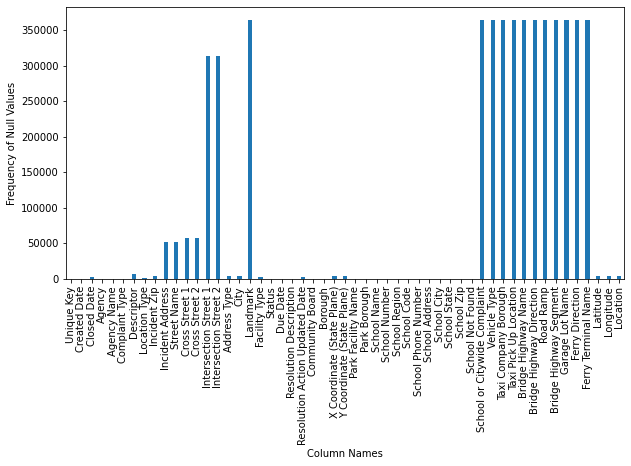

In [83]:
#2.1 Draw a frequency plot to show the number of numm values in each column of the DataFrame
df.isna().sum().plot.bar(xlabel="Column Names",ylabel="Frequency of Null Values",width=0.4,figsize=(10,5))
#plotted using pandas

In [256]:
#dropping all columns whos percentage of null values is more than 20%
drop_col=[]
for i in df.columns:
    if df[i].isnull().sum()/len(df)*100 >=20:
        drop_col.append(i)
df.drop(axis=1,columns=drop_col,inplace=True)        
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      362177 non-null  object        
 1   Created Date                    362177 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          362177 non-null  object        
 4   Agency Name                     362177 non-null  object        
 5   Complaint Type                  362177 non-null  object        
 6   Descriptor                      355681 non-null  object        
 7   Location Type                   362047 non-null  object        
 8   Incident Zip                    361502 non-null  object        
 9   Incident Address                310491 non-null  object        
 10  Street Name                     310491 non-null  object 

In [86]:
#2.2 Remove the records whose Closed Date values are null
df = df.dropna(axis=0,subset=['Closed Date'])

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568153633767,-73.92350095571744,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945312321085,-73.91509393898605,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870324522111424,-73.88852464418646,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599404683083,-73.82837939584206,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733059618956815,-73.87416975810375,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.69514470265117,-73.86094888534394,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86782963689454,-73.90717786644662,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821646626438095,-73.95087342885292,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.88636077906953,-73.85329048666742,"(40.88636077906953, -73.85329048666742)"


In [88]:
#verifying that all the null values are removed from Closed Value column
df['Closed Date'].isna().any()

False

In [207]:
#2.3 Analyze the date column, and remove entries that have an incorrect timeline
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')
df= df.dropna(subset=['Created Date'])
df= df.dropna(subset=['Closed Date'])




In [260]:
#2.3.1 calculate the time elapsed in closed and creation date
df['time_elapsed']=df['Closed Date']-df['Created Date']
df['Request_closing_time']=df['time_elapsed'].astype('timedelta64[s]')
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,time_elapsed,Request_closing_time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,12464.0


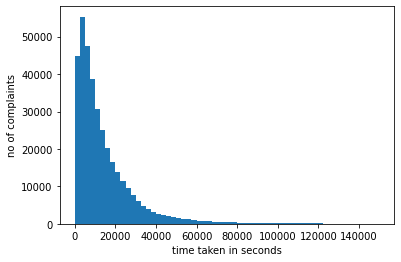

In [278]:
plt.hist(df['Request_closing_time'],range =(0,150000),bins =60)
plt.xlabel('time taken in seconds')
plt.ylabel('no of complaints')
plt.show()

In [224]:
#2.3.4 Check the number of null values in the Complaint_Type and City columns
df[['Complaint Type','City']].isnull().sum()

Complaint Type      0
City              674
dtype: int64

In [228]:
#2.3.5 Impute the NA value with Unknown City
df['City'].fillna('UNKNOWN CITY',inplace =True)

54


<AxesSubplot:title={'center':'complaints in each city'}, xlabel='City', ylabel='Frequency of complaints'>

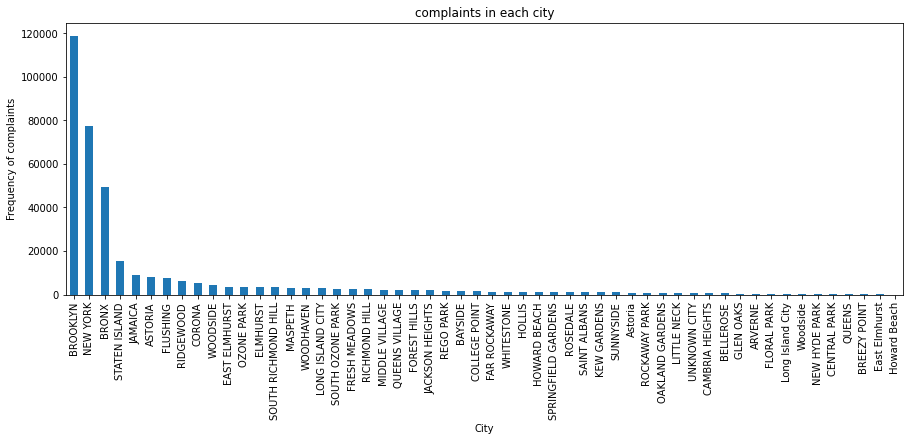

In [279]:
#2.3.6 Draw a frequency plot for the complaints in each city
#printing how many unique 
print(df['City'].nunique())
#plotting the city against the frequency 
df['City'].value_counts().plot.bar(title="complaints in each city",xlabel="City",ylabel="Frequency of complaints",figsize=(15,5))

<BarContainer object of 54 artists>

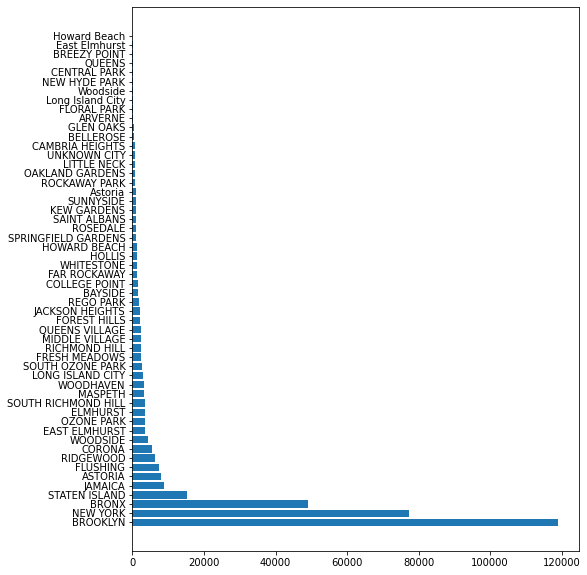

In [288]:
#plotting city against freq using matplotlib
a=df['City'].value_counts(ascending=False)
plt.figure(figsize=(8,10))
plt.barh(a.index,a)

In [217]:
#converting lat and long to numeric data type
df[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']].apply(pd.to_numeric)


In [222]:
df.dtypes


Unique Key                                object
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

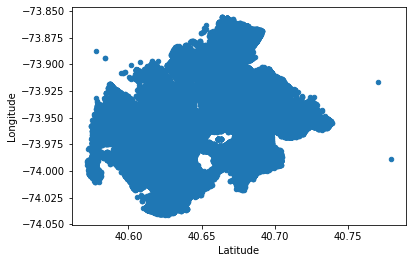

In [281]:
#2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn
df_brooklyn = df.loc[df['City']=="BROOKLYN"]
pd.to_numeric
df_brooklyn[['Latitude','Longitude']].plot(kind='scatter', y='Longitude', x='Latitude')

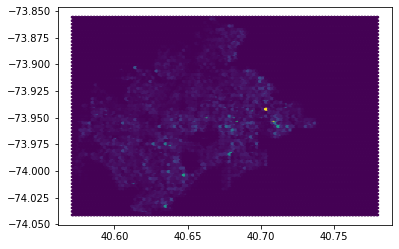

In [299]:
plt.hexbin(x=df_brooklyn['Latitude'],y=df_brooklyn['Longitude'],cmap='viridis')

<AxesSubplot:title={'center':'types of complaints'}, xlabel='complaint type', ylabel='Frequency'>

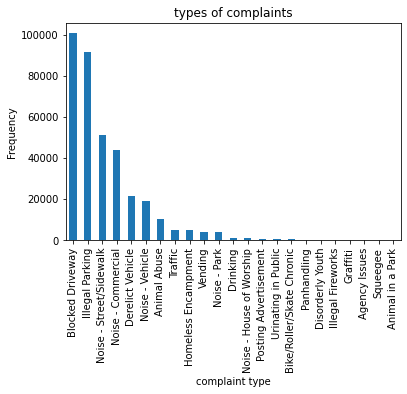

In [126]:
#3.1 Plot a bar graph to show the types of complaints
df['Complaint Type'].value_counts().plot.bar(title="types of complaints",xlabel="complaint type",ylabel="Frequency")

<AxesSubplot:>

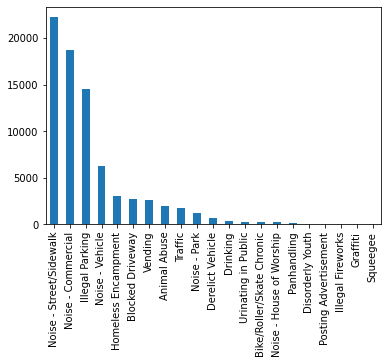

In [134]:
#3.2 Check the frequency of various types of complaints for New York City
df_new_york = df.loc[df['City']=="NEW YORK"]
#print(df_new_york.head())
df_new_york['Complaint Type'].value_counts().plot.bar()

In [303]:
#3.3 Find the top 10 complaint types
print(df['Complaint Type'].value_counts().head(10))
print()
print(list(df['Complaint Type'].value_counts().head(10).keys()))
print()
#different methods
print(df['Complaint Type'].value_counts(ascending = False)[0:10])

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk', 'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle', 'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending']

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64


In [308]:
complaint_type = df.groupby(['City'])['Complaint Type'].value_counts().unstack()
complaint_type

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,46.0,NaN,NaN,50.0,32.0,2.0,1.0,1.0,4.0,...,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,170.0,NaN,16.0,3436.0,426.0,5.0,43.0,4.0,32.0,...,21.0,64.0,409.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
Astoria,NaN,NaN,NaN,NaN,159.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,NaN,53.0,NaN,NaN,514.0,231.0,2.0,1.0,3.0,2.0,...,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,NaN,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,1.0,...,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN
BREEZY POINT,NaN,2.0,NaN,NaN,3.0,3.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,1971.0,NaN,22.0,17062.0,2402.0,66.0,206.0,15.0,275.0,...,90.0,548.0,9144.0,3556.0,20.0,18.0,NaN,427.0,54.0,433.0
BROOKLYN,NaN,3191.0,NaN,124.0,36445.0,6257.0,79.0,291.0,60.0,948.0,...,389.0,1575.0,13982.0,5965.0,49.0,58.0,NaN,1258.0,155.0,575.0
CAMBRIA HEIGHTS,NaN,15.0,NaN,NaN,177.0,148.0,NaN,NaN,NaN,6.0,...,2.0,NaN,29.0,100.0,NaN,NaN,NaN,7.0,NaN,NaN


<AxesSubplot:ylabel='City'>

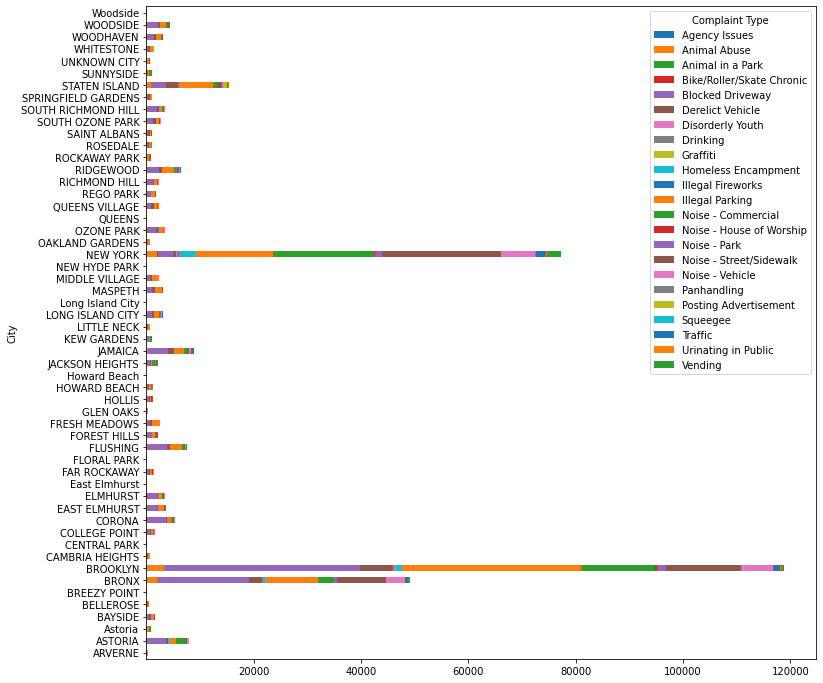

In [312]:
complaint_type.plot(kind ='barh',stacked=True,figsize=(12,12))

<AxesSubplot:ylabel='Location Type'>

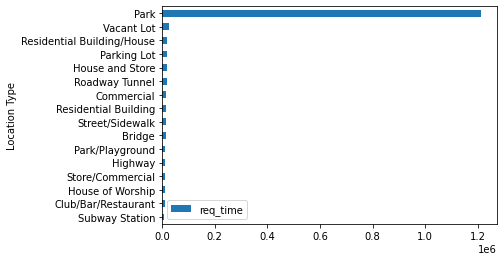

In [352]:
df.groupby(['Location Type'])['Request_closing_time'].mean().to_frame(name='req_time').sort_values('req_time').plot(kind='barh')


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      362177 non-null  object         
 1   Created Date                    362177 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          362177 non-null  object         
 4   Agency Name                     362177 non-null  object         
 5   Complaint Type                  362177 non-null  object         
 6   Descriptor                      355681 non-null  object         
 7   Location Type                   362047 non-null  object         
 8   Incident Zip                    361502 non-null  object         
 9   Incident Address                310491 non-null  object         
 10  Street Name                     310491 non-n

In [355]:
#printing no of unique values in each column
for i in df.columns:
    print(i,df[i].nunique()) # we can also use df[i].unique().size

Unique Key 362177
Created Date 359655
Closed Date 339837
Agency 1
Agency Name 3
Complaint Type 23
Descriptor 43
Location Type 16
Incident Zip 201
Incident Address 125177
Street Name 7213
Cross Street 1 6101
Cross Street 2 6064
Address Type 5
City 54
Facility Type 1
Status 4
Due Date 359654
Resolution Description 14
Resolution Action Updated Date 340820
Community Board 75
Borough 6
X Coordinate (State Plane) 68410
Y Coordinate (State Plane) 79923
Park Facility Name 2
Park Borough 6
School Name 2
School Number 2
School Region 1
School Code 1
School Phone Number 2
School Address 2
School City 2
School State 2
School Zip 1
School Not Found 1
Latitude 146732
Longitude 146465
Location 146743
time_elapsed 56190
Request_closing_time 56190


In [359]:
#removing categorical columns with a lot of values
#removing all columns with more than 50  unique values
#preserving response time as it will get removed
x= df['Request_closing_time']
remove_unique_val=[]
for i in df.columns:
    if df[i].nunique()>50:
        remove_unique_val.append(i)
df.drop(axis=1,columns=remove_unique_val,inplace=True)

df['Request_closing_time']=x
df.info()
print()
for i in df.columns:
    print(i,df[i].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Agency                  362177 non-null  object 
 1   Agency Name             362177 non-null  object 
 2   Complaint Type          362177 non-null  object 
 3   Descriptor              355681 non-null  object 
 4   Location Type           362047 non-null  object 
 5   Address Type            361248 non-null  object 
 6   Facility Type           362159 non-null  object 
 7   Status                  362177 non-null  object 
 8   Resolution Description  362177 non-null  object 
 9   Borough                 362177 non-null  object 
 10  Park Facility Name      362177 non-null  object 
 11  Park Borough            362177 non-null  object 
 12  School Name             362177 non-null  object 
 13  School Number           362177 non-null  object 
 14  School Region       

In [361]:
#removing variables with less than 2 unique values
check=[]
for i in df.columns:
    if(df[i].nunique()<=4):
        check.append(i)
df.drop(axis=1,columns=check,inplace=True) 
df.info()
print()
for i in df.columns:
    print(i,df[i].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Complaint Type          362177 non-null  object 
 1   Descriptor              355681 non-null  object 
 2   Location Type           362047 non-null  object 
 3   Address Type            361248 non-null  object 
 4   Resolution Description  362177 non-null  object 
 5   Borough                 362177 non-null  object 
 6   Park Borough            362177 non-null  object 
 7   Request_closing_time    362177 non-null  float64
dtypes: float64(1), object(7)
memory usage: 32.9+ MB

Complaint Type 23
Descriptor 43
Location Type 16
Address Type 5
Resolution Description 14
Borough 6
Park Borough 6
Request_closing_time 56190


## checking the influence of the above 6 factors on request closing time

In [364]:
df['Borough'].value_counts()

BROOKLYN         118851
QUEENS           100754
MANHATTAN         77439
BRONX             49164
STATEN ISLAND     15334
Unspecified         635
Name: Borough, dtype: int64

In [365]:
df['Park Borough'].value_counts()

BROOKLYN         118851
QUEENS           100754
MANHATTAN         77439
BRONX             49164
STATEN ISLAND     15334
Unspecified         635
Name: Park Borough, dtype: int64

In [366]:
df['Descriptor'].value_counts()

No Access                         75715
Loud Music/Party                  69080
Posted Parking Sign Violation     27013
Partial Access                    24909
Loud Talking                      23591
With License Plate                21518
Blocked Hydrant                   19797
Commercial Overnight Parking      14705
Blocked Sidewalk                  13711
Car/Truck Music                   11894
Double Parked Blocking Traffic     7057
Engine Idling                      5312
Double Parked Blocking Vehicle     5164
Neglected                          5125
Banging/Pounding                   4901
Car/Truck Horn                     4457
Congestion/Gridlock                3236
Other (complaint details)          2487
In Prohibited Area                 2205
Overnight Commercial Storage       2101
Unlicensed                         1980
Unauthorized Bus Layover           1589
Truck Route Violation              1124
Tortured                           1038
In Public                           967


In [367]:
df['Resolution Description'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                                                               107046
The Police Department responded to the complaint and took action to fix the condition.                                                                                                                                                                                                                                                                                                                                                                                                                     